In [1]:
import numpy as np

import matplotlib.pyplot as plt

In [2]:
D_THETA = 0.01
D_PHI = 0.01

THETA, PHI = np.meshgrid(np.arange(0.0, 2 * np.pi, D_THETA),
                         np.arange(0.0, np.pi, D_PHI))

K = 8.987551787e9

# Electric Field from Point Charge

Let $\mathbf{r}$ define the location of the point charge and let $\mathbf{p}$ be the point of interest we are calculating the electric field at. The unit vector from $\mathbf{r}$ to $\mathbf{p}$ is found via

$$
\begin{align*}
\hat{\mathbf{r}} = \frac{\mathbf{p} - \mathbf{r}}{|\mathbf{p} - \mathbf{r}|} \\
\end{align*}
$$

so by Coulomb's law, the electric field is calculated as

$$
\begin{align*}
\mathbf{E} &= \frac{q}{|\mathbf{p} - \mathbf{r}|^2} \hat{\mathbf{r}} \\
           &= \frac{q}{|\mathbf{p} - \mathbf{r}|^3} (\mathbf{p} - \mathbf{r})
\end{align*}
$$

In [3]:
def E_point_charge(X, Y, Z, center_x = 0.0, center_y = 0.0, center_z = 0.0, charge = 1.0, epsilon = 1.0e-10):
    X = np.asarray(X)
    Y = np.asarray(Y)
    Z = np.asarray(Z)

    dx = X - center_x
    dy = Y - center_y
    dz = Z - center_z
    # Avoid division by really really small numbers.
    d2 = np.maximum(epsilon, dx**2.0 + dy**2.0 + dz**2.0)

    coefs = charge / d2**(3/2)

    E_x = coefs * dx
    E_y = coefs * dy
    E_z = coefs * dz
    
    return E_x, E_y, E_z

## Example Electric Field from Point Charge

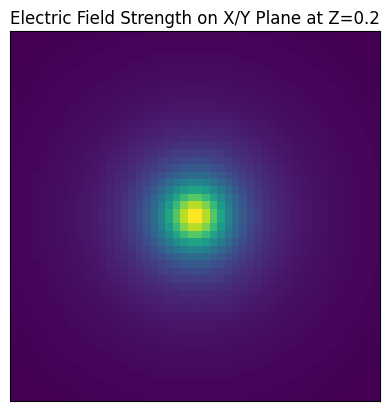

In [4]:
def sample():
    sigma = 1

    def plot_electric_field_strength_on_z(z):
        N = 50

        X, Y = np.meshgrid(np.linspace(-1.5, 1.5, N),
                           np.linspace(-1.5, 1.5, N))

        E_x, E_y, E_z = E_point_charge(X, Y, z)

        result = K * np.sqrt(E_x**2.0 + E_y**2.0 + E_z**2.0)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        
        ax.set_title('Electric Field Strength on X/Y Plane at Z={:.1f}'.format(z))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(result)
        plt.show()

    # Show the electric field strength.
    plot_electric_field_strength_on_z(0.25)

sample()

## Example Electric Field from Two Similar Point Charges

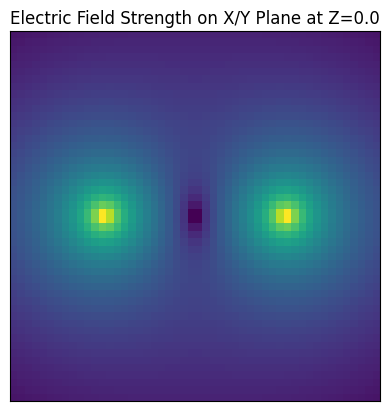

In [5]:
def sample():
    sigma = 1

    def plot_electric_field_strength_on_z(z):
        N = 50

        X, Y = np.meshgrid(np.linspace(-1.5, 1.5, N),
                           np.linspace(-1.5, 1.5, N))

        E1_x, E1_y, E1_z = E_point_charge(X, Y, z, charge=1.0, center_x= .75)
        E2_x, E2_y, E2_z = E_point_charge(X, Y, z, charge=1.0, center_x=-.75)

        E_x = E1_x + E2_x
        E_y = E1_y + E2_y
        E_z = E1_z + E2_z

        def reduct(x):
            return np.log(x + 1)
        result = reduct(reduct(K * np.sqrt(E_x**2.0 + E_y**2.0 + E_z**2.0)))
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        
        ax.set_title('Electric Field Strength on X/Y Plane at Z={:.1f}'.format(z))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(result)
        plt.show()

    # Show the electric field strength.
    plot_electric_field_strength_on_z(0.0)

sample()

# Electric Field from Spherical Shell

This function computes the electric field due to a spherical shell on a spatial meshgrid defined by `X`, `Y`, and `Z`. The spherical shell has a radius, `radius`, and surface charge density, `sigma`. It is also centered at the point defined by `center_x`, `center_y`, and `center_z`. To avoid asymptotic behavior at points around the shell, choose an `epsilon` quite smaller than the steps in `X`, `Y`, and `Z`.

Assume the spherical shell is centered at the origin with radius $r$ and surface charge density $\sigma$. Calculating the electric field involves a surface integral using spherical coordinates in $\theta$ and $\phi$ where

$$
\begin{align*}
\hfill 0 \le \theta \le 2 \pi \hfill \\
0 \le \phi \le \pi \\
\end{align*}
$$

with paramaterization

$$
\begin{align*}
\mathbf{r} &= \langle r \cos \theta \sin \phi, r \sin \theta \sin \phi, r \cos \phi \rangle \\
dA &= r^2 \sin \phi \, d\phi \, d\theta.
\end{align*}
$$

Let $\mathbf{p} = \langle x, y, z \rangle$ be the point at which the field is calculated. Then the radial unit vector is

$$
\begin{align*}
\hat{\mathbf{r}} = \frac{\mathbf{p} - \mathbf{r}}{|\mathbf{p} - \mathbf{r}|} \\
\end{align*}
$$

and the electric field is calculated by

$$
\begin{align*}
\mathbf{E} &= \int_0^{2\pi} \int_0^\pi \frac{\sigma}{ |\mathbf{p} - \mathbf{r}|^2 } \hat{\mathbf{r}} \, dA \\
           &= \int_0^{2\pi} \int_0^\pi \frac{\sigma}{ |\mathbf{p} - \mathbf{r}|^3 } (\mathbf{p} - \mathbf{r}) \, dA.
\end{align*}
$$

In [6]:
def E_spherical_shell(X, Y, Z, center_x = 0.0, center_y = 0.0, center_z = 0.0, radius = 1.0, sigma = 1.0, epsilon = 1.0e-10):
    X = np.asarray(X)
    Y = np.asarray(Y)
    Z = np.asarray(Z)

    sin_phi = np.sin(PHI)
    dA = radius**2 * sin_phi * D_PHI * D_THETA

    rx = radius * np.cos(THETA) * sin_phi + center_x
    ry = radius * np.sin(THETA) * sin_phi + center_y
    rz = radius * np.cos(PHI) + center_z

    dx = X[..., None, None] - rx
    dy = Y[..., None, None] - ry
    dz = Z[..., None, None] - rz
    # Avoid division by really really small numbers.
    d2 = np.maximum(epsilon, dx**2.0 + dy**2.0 + dz**2.0)

    coefs = sigma / d2**(3/2) * dA

    E_x = np.sum(coefs * dx, axis=(-2, -1))
    E_y = np.sum(coefs * dy, axis=(-2, -1))
    E_z = np.sum(coefs * dz, axis=(-2, -1))
    
    return E_x, E_y, E_z

## Electric Field Strength Plotted on X/Y Axis Inside and Around a Spherical Shell

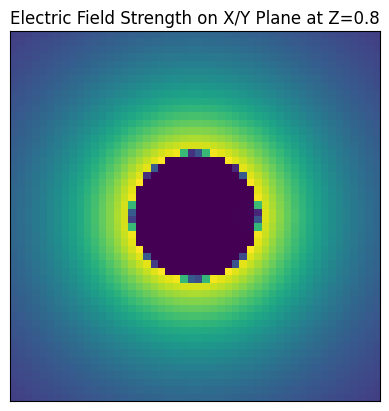

In [7]:
def sample():
    sigma = 1

    def plot_electric_field_strength_on_z(z):
        N = 50

        X, Y = np.meshgrid(np.linspace(-1.5, 1.5, N),
                           np.linspace(-1.5, 1.5, N))

        E_x, E_y, E_z = E_spherical_shell(X, Y, z)

        result = K * np.sqrt(E_x**2.0 + E_y**2.0 + E_z**2.0)
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        
        ax.set_title('Electric Field Strength on X/Y Plane at Z={:.1f}'.format(z))
        ax.set_xticks([])
        ax.set_yticks([])
        
        ax.imshow(result)
        plt.show()

    # Show the electric field strength.
    plot_electric_field_strength_on_z(0.85)

sample()

## Electric Field Strength Plotted on X/Y Axis Inside and Around Nested Spherical Shells of Oppposing Charge

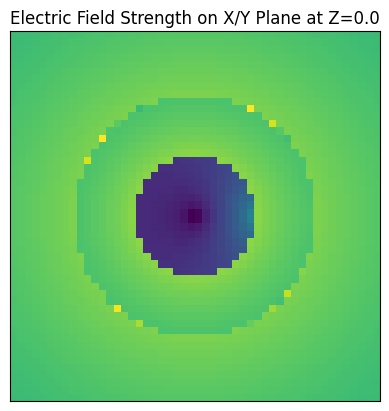

In [8]:
def sample():
    sigma = 1

    def plot_electric_field_strength_on_z(z):
        N = 50

        X, Y = np.meshgrid(np.linspace(-1.5, 1.5, N),
                           np.linspace(-1.5, 1.5, N))

        E1_x, E1_y, E1_z = E_spherical_shell(X, Y, z, radius = 1.0, sigma =  1.0)
        E2_x, E2_y, E2_z = E_spherical_shell(X, Y, z, radius = 0.5, sigma = -1.0)
        
        E_x = E1_x + E2_x
        E_y = E1_y + E2_y
        E_z = E1_z + E2_z

        # log for aesthetics.
        result = np.log(K * np.sqrt(E_x**2.0 + E_y**2.0 + E_z**2.0))
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        
        ax.set_title('Electric Field Strength on X/Y Plane at Z={:.1f}'.format(z))
        ax.set_xticks([])
        ax.set_yticks([])
        
        ax.imshow(result)
        plt.show()

    # Show the electric field strength.
    plot_electric_field_strength_on_z(0.0)

sample()

## Electric Field Strength Plotted on X/Y Axis Inside and Around Overlapping Spherical Shells of Oppposing Charge

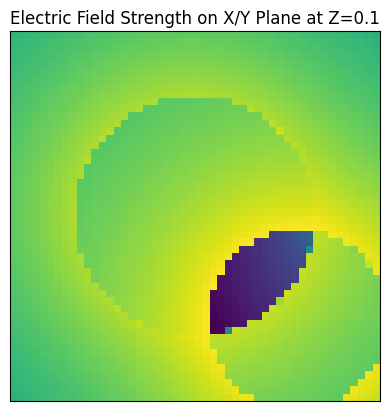

In [9]:
def sample():
    sigma = 1

    def plot_electric_field_strength_on_z(z):
        N = 50

        X, Y = np.meshgrid(np.linspace(-1.5, 1.5, N),
                           np.linspace(-1.5, 1.5, N))

        E1_x, E1_y, E1_z = E_spherical_shell(X, Y, z, radius = 1.0,  sigma =  1.0)
        E2_x, E2_y, E2_z = E_spherical_shell(X, Y, z, radius = 0.75, sigma = -2.0, center_x = 0.85, center_y = 0.85)
        
        E_x = E1_x + E2_x
        E_y = E1_y + E2_y
        E_z = E1_z + E2_z

        # log for aesthetics.
        result = np.log(K * np.sqrt(E_x**2.0 + E_y**2.0 + E_z**2.0))
        
        fig = plt.figure()
        ax = fig.add_subplot(111)
        
        ax.set_title('Electric Field Strength on X/Y Plane at Z={:.1f}'.format(z))
        ax.set_xticks([])
        ax.set_yticks([])
        
        ax.imshow(result)
        plt.show()

    # Show the electric field strength.
    plot_electric_field_strength_on_z(0.1)

sample()